In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from inverse_utils import sampling_mask_gen, ifft, nrmse_np
from skimage.metrics import structural_similarity as ssim

In [2]:
samp_num = 0
sz = 256
R = 3
gamma = 1.
seed = 30
file = f'/home/blevac/infty-diff/results/sample_num{samp_num}_img_size{sz}_R{R}_gamma{gamma}_seed{seed}.pt'
cont = torch.load(file)
print(cont.keys())

gt_img = cont['gt_img']
recon_img = cont['img_out']
deblurred_recon_img = cont['deblurred_img_out']
inverse_recon_img = cont['inverse_deblurred_img_out']
kspace = torch.tensor(cont['kspace'])
# img_stack = cont['img_stack']
ZF_recon = ifft(kspace).numpy()
mask = cont['mask'].cpu()
print(ZF_recon.shape)
print(gt_img.shape)
print(recon_img.shape)
# print(img_stack.shape)

# recon_img=img_stack[-2][None].numpy()

dict_keys(['gt_img', 'deblurred_img_out', 'inverse_deblurred_img_out', 'img_out', 'kspace', 'mask'])
(1, 1, 256, 256)
(1, 1, 256, 256)
(1, 1, 256, 256)


In [3]:
nrmse_ZF = nrmse_np(abs(gt_img), abs(ZF_recon))
nrmse_mol = nrmse_np(abs(gt_img), abs(recon_img))
nrmse_db = nrmse_np(abs(gt_img), abs(deblurred_recon_img))
nrmse_inv = nrmse_np(abs(gt_img), abs(inverse_recon_img))

ssim_ZF = ssim(abs(gt_img[0,0]), abs(ZF_recon[0,0]), data_range=abs(gt_img).max()-abs(gt_img).min())
ssim_mol = ssim(abs(gt_img[0,0]), abs(recon_img[0,0]), data_range=abs(gt_img).max()-abs(gt_img).min())
ssim_db = ssim(abs(gt_img[0,0]), abs(deblurred_recon_img[0,0]), data_range=abs(gt_img).max()-abs(gt_img).min())
ssim_inv = ssim(abs(gt_img[0,0]), abs(inverse_recon_img[0,0]), data_range=abs(gt_img).max()-abs(gt_img).min())

print('NRMSE ZF: ', nrmse_ZF, 'SSIM ZF: ', ssim_ZF)
print('NRMSE MOL: ', nrmse_mol, 'SSIM MOL: ', ssim_mol)
print('NRMSE DB: ', nrmse_db, 'SSIM DB: ', ssim_db)
print('NRMSE INV: ', nrmse_inv, 'SSIM INV: ', ssim_inv)

NRMSE ZF:  0.7366398446999294 SSIM ZF:  0.32842399887693774
NRMSE MOL:  0.23505804855439402 SSIM MOL:  0.882224631590879
NRMSE DB:  0.19035036755077403 SSIM DB:  0.9110805307175245
NRMSE INV:  0.24837696591088593 SSIM INV:  0.8424194516860144


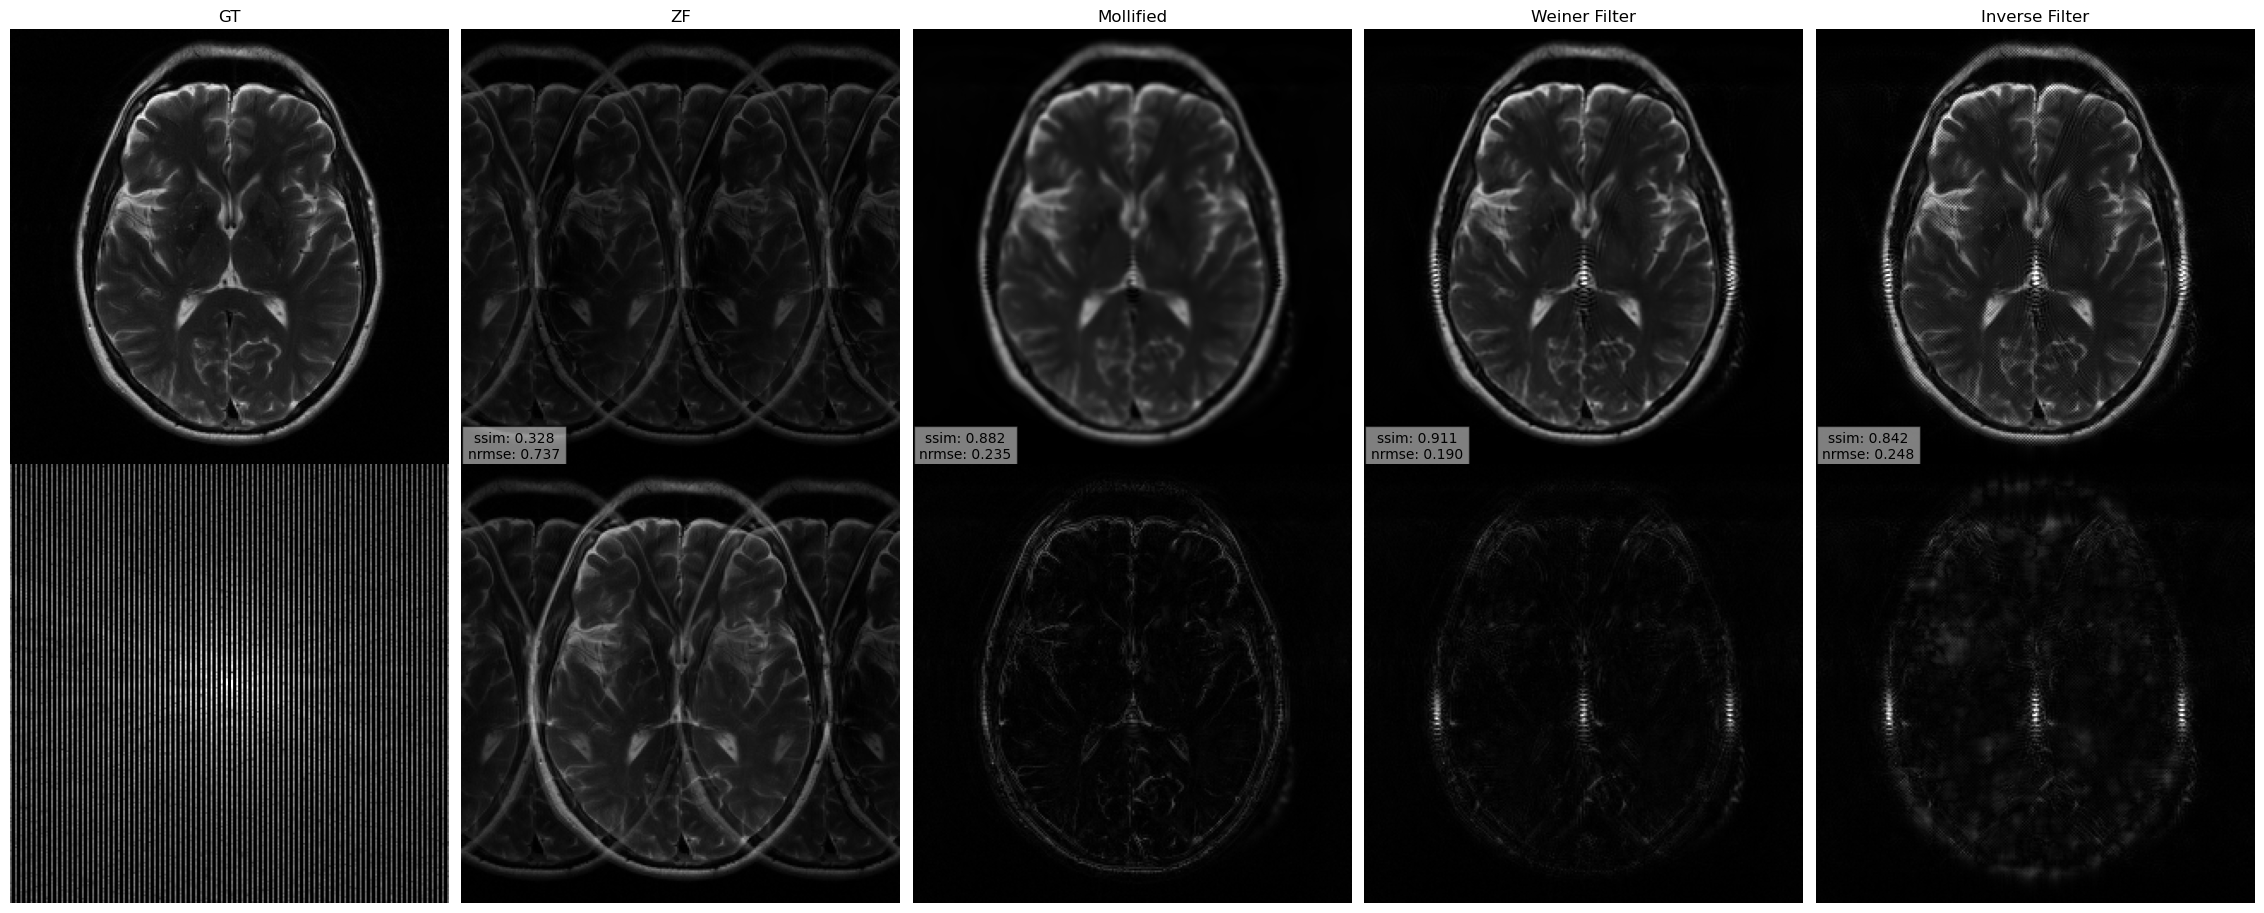

In [4]:
plt.figure(figsize=(22.5,9))
plt.subplot(2,5,1)
plt.title('GT')
plt.imshow(np.flipud(abs(gt_img[0,0])),cmap='gray',vmin=0, vmax = 1)
plt.axis('off')
plt.subplot(2,5,2)
plt.title('ZF')
plt.imshow(np.flipud(abs(ZF_recon[0,0])),cmap='gray', vmin=0, vmax=1)
plt.text(.12, 0.05, f'ssim: {ssim_ZF:.3f}\nnrmse: {nrmse_ZF:.3f}', horizontalalignment='center',verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5),transform=plt.gca().transAxes)

plt.axis('off')
plt.subplot(2,5,3)
plt.title('Mollified')
plt.imshow(np.flipud(abs(recon_img[0,0])),cmap='gray', vmin=0, vmax=1)
plt.text(.12, 0.05, f'ssim: {ssim_mol:.3f}\nnrmse: {nrmse_mol:.3f}', horizontalalignment='center',verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5),transform=plt.gca().transAxes)

plt.axis('off')
plt.subplot(2,5,4)
plt.title('Weiner Filter')
plt.imshow(np.flipud(abs(deblurred_recon_img[0,0])),cmap='gray',vmin=0, vmax = 1)
plt.text(.12, 0.05, f'ssim: {ssim_db:.3f}\nnrmse: {nrmse_db:.3f}', horizontalalignment='center',verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5),transform=plt.gca().transAxes)
plt.axis('off')

plt.axis('off')
plt.subplot(2,5,5)
plt.title('Inverse Filter')
plt.imshow(np.flipud(abs(inverse_recon_img[0,0])),cmap='gray',vmin=0, vmax = 1)
plt.text(.12, 0.05, f'ssim: {ssim_inv:.3f}\nnrmse: {nrmse_inv:.3f}', horizontalalignment='center',verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5),transform=plt.gca().transAxes)
plt.axis('off')

plt.subplot(2,5,6)
plt.imshow(np.flipud(abs((kspace)[0,0]**.2)),cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(2,5,7)
plt.imshow(np.flipud(abs((gt_img-ZF_recon)[0,0])),cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(2,5,8)
plt.imshow(np.flipud(abs((gt_img-recon_img)[0,0])),cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(2,5,9)
plt.imshow(np.flipud(abs((gt_img-deblurred_recon_img)[0,0])),cmap='gray',vmin=0, vmax = 1)
plt.axis('off')
plt.subplot(2,5,10)
plt.imshow(np.flipud(abs((gt_img-inverse_recon_img)[0,0])),cmap='gray',vmin=0, vmax = 1)
plt.axis('off')

plt.tight_layout(pad=0.2)

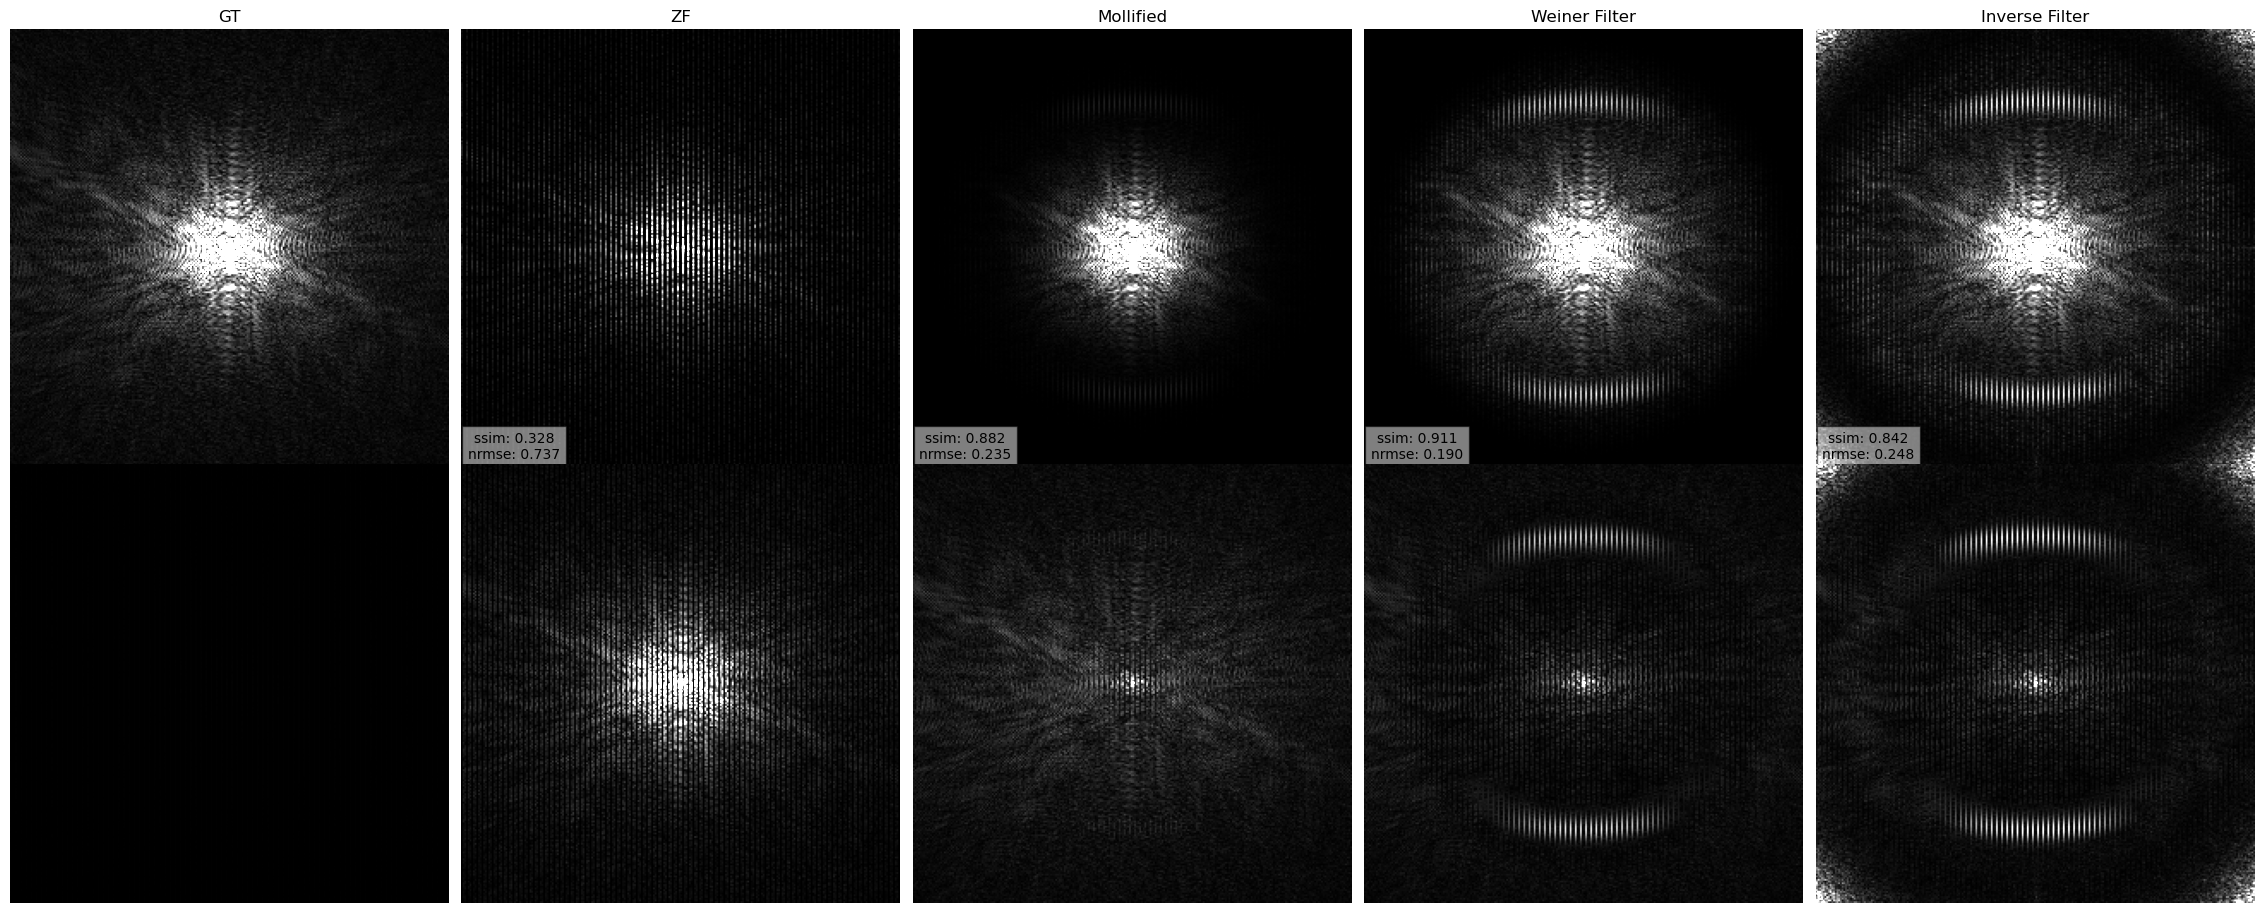

In [10]:
# numpy centered 2d fft
def fft(x):
    return np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(x)))

vmax = 100
plt.figure(figsize=(22.5,9))
plt.subplot(2,5,1)
plt.title('GT')
plt.imshow(np.flipud(abs(fft(gt_img)[0,0])),cmap='gray',vmin=0, vmax = vmax)
plt.axis('off')
plt.subplot(2,5,2)
plt.title('ZF')
plt.imshow(np.flipud(abs(fft(ZF_recon)[0,0])),cmap='gray', vmin=0, vmax=vmax)
plt.text(.12, 0.05, f'ssim: {ssim_ZF:.3f}\nnrmse: {nrmse_ZF:.3f}', horizontalalignment='center',verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5),transform=plt.gca().transAxes)

plt.axis('off')
plt.subplot(2,5,3)
plt.title('Mollified')
plt.imshow(np.flipud(abs(fft(recon_img)[0,0])),cmap='gray', vmin=0, vmax=vmax)
plt.text(.12, 0.05, f'ssim: {ssim_mol:.3f}\nnrmse: {nrmse_mol:.3f}', horizontalalignment='center',verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5),transform=plt.gca().transAxes)

plt.axis('off')
plt.subplot(2,5,4)
plt.title('Weiner Filter')
plt.imshow(np.flipud(abs(fft(deblurred_recon_img)[0,0])),cmap='gray',vmin=0, vmax = vmax)
plt.text(.12, 0.05, f'ssim: {ssim_db:.3f}\nnrmse: {nrmse_db:.3f}', horizontalalignment='center',verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5),transform=plt.gca().transAxes)
plt.axis('off')

plt.axis('off')
plt.subplot(2,5,5)
plt.title('Inverse Filter')
plt.imshow(np.flipud(abs(fft(inverse_recon_img)[0,0])),cmap='gray',vmin=0, vmax = vmax)
plt.text(.12, 0.05, f'ssim: {ssim_inv:.3f}\nnrmse: {nrmse_inv:.3f}', horizontalalignment='center',verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5),transform=plt.gca().transAxes)
plt.axis('off')

plt.subplot(2,5,6)
plt.imshow(np.flipud(abs((kspace)[0,0]**.2)),cmap='gray', vmin=0, vmax=vmax)
plt.axis('off')
plt.subplot(2,5,7)
plt.imshow(np.flipud(abs((fft(gt_img-ZF_recon))[0,0])),cmap='gray', vmin=0, vmax=vmax)
plt.axis('off')
plt.subplot(2,5,8)
plt.imshow(np.flipud(abs((fft(gt_img-recon_img))[0,0])),cmap='gray', vmin=0, vmax=vmax)
plt.axis('off')
plt.subplot(2,5,9)
plt.imshow(np.flipud(abs((fft(gt_img-deblurred_recon_img))[0,0])),cmap='gray',vmin=0, vmax = vmax)
plt.axis('off')
plt.subplot(2,5,10)
plt.imshow(np.flipud(abs((fft(gt_img-inverse_recon_img))[0,0])),cmap='gray',vmin=0, vmax = vmax)
plt.axis('off')

plt.tight_layout(pad=0.2)